In [1]:

def calc_vn(V0, G1, G2):
    return 10 * V0 / ((G1 * G2)**2)
vn = calc_vn(0.0503, 600, 1500)
print(vn)
def calc_kb(V,R,T,F):
    return ( V) / (4* R * T* F)

def calc_vj(V, G1, G2):
    return ((10*V) / ((G1 * G2)**2)) - vn

6.209876543209877e-13


In [9]:
## CONSTANTS
CONST_G1 = 600
CONST_G2 = 1500
CONST_R = 10000
CONST_VOUT = .08735
CONST_DELTA_F = 9957.4 # THIS IS FOR .1 TO 100KHZ
CONST_TEMP = 77 #ROOM TEMP MEASURED ABOVE HLE

In [10]:
kb = calc_kb( calc_vj(CONST_VOUT,CONST_G1,CONST_G2 ), CONST_R, CONST_TEMP, CONST_DELTA_F )
print(kb)

1.4914425302679264e-23


In [8]:
## CORRECT VALUE IS 1.38  

# BEGIN SCRIPT

In [5]:
import pandas as pd

In [77]:
df = pd.read_csv("data2.csv")
df["kb"] = df["R_in"]
df["vj"] = df["R_in"]
df["s"] = df["R_in"]

In [67]:
# df

,R_in,V_out,kb
0,10.0,0.5755,10.0
1,10.0,0.5746,10.0
2,10.0,0.5740,10.0
3,10.0,0.5757,10.0
4,10.0,0.5762,10.0
5,10.0,0.5757,10.0
6,10.0,0.5746,10.0
7,10.0,0.5755,10.0
8,10.0,0.5748,10.0
9,10.0,0.5753,10.0


In [68]:
df.loc[1,"kb"]

10.0

In [78]:


for i in range(df.iloc[:,0].size):
    # print() # r
    # print(df.iloc[i, 1]) # V
    df.loc[i,"kb"] = calc_kb( calc_vj(df.iloc[i, 1],CONST_G1,CONST_G2 ), df.iloc[i,0], CONST_TEMP, CONST_DELTA_F )
    df.loc[i,"s"] = calc_vj(df.iloc[i, 1],CONST_G1,CONST_G2 ) / CONST_DELTA_F 
    # kb_column.append()


In [79]:
df["kb"].mean()

1.5395296173043582e-23

In [80]:
df

,R_in,V_out,kb,vj,s
0,10.0,0.5755,2.142150e-23,10.0,2.559013e-19
1,10.0,0.5746,1.303918e-23,10.0,1.557660e-19
2,10.0,0.5740,7.450958e-24,10.0,8.900914e-20
3,10.0,0.5757,2.328424e-23,10.0,2.781536e-19
4,10.0,0.5762,2.794109e-23,10.0,3.337843e-19
5,10.0,0.5757,2.328424e-23,10.0,2.781536e-19
6,10.0,0.5746,1.303918e-23,10.0,1.557660e-19
7,10.0,0.5755,2.142150e-23,10.0,2.559013e-19
8,10.0,0.5748,1.490192e-23,10.0,1.780183e-19
9,10.0,0.5753,1.955876e-23,10.0,2.336490e-19


In [81]:
# y = S, x = R



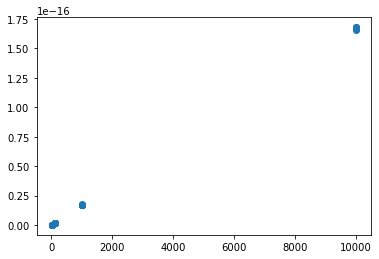

In [82]:
import matplotlib.pyplot as plt
plt.scatter(df['R_in'], df['s'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.